### Mehmet YALÇIN

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
# loading dataset
df = pd.read_excel(r"C:\Users\myalc\OneDrive\Masaüstü\İTO\machine learning\ODEV 2\banka.xlsx")

DATA HAKKINDA...

* maas	    :Maaş Müşterisi mi?
* vadeli	:Vadeli Mevduatı var mı?
* yatirim	:Yatırım ürünlerini kullanıyor mu?
* kart	    :Kredi Kartı var mı?
* kredi	    :İhtiyaç Kredisi var mı?
* bes	    :Bireysel Emeklilik Sigortası var mı?
* sigorta	:Sağlık, Hayat vb. sigortası var mı?
* sube	    :Son 1 ayda şubeye gitti mi?
* atm	    :Son 1 ayda ATM'yi kullandı mi?
* intmob	:Son 1 ayda İnternet Bankacılığını ya da Mobil Bankacılığı kullandı mı?
* cagmerk	:Son 1 ayda Çağrı Merkezini aradı mı?
* yil	    :Kaç yıldır bankanın müşterisi?
* yas	    :Müşterinin yaşı
* cins  	:Müşterinin cinsiyeti
* egitim	:Müşterinin eğitim seviyesi
* effort_kat :Bankadaki işlemlerinizi ne derece kolay yapıyorsunuz?  (Bağımlı Değişken)



## PROBLEM

#### Verideki değişkenleri kullanarak sınıflandırma algoritmaları ile müşterilen bankadaki işlemlerini ne derece kolay yaptığını tahminleyen bir model geliştirmek istiyoruz.


## Veri Ön İşleme 

In [3]:
df.head() #ilk 5 satırı görelim

,maas,vadeli,yatirim,kart,kredi,bes,sigorta,sube,atm,intmob,cagmerk,yil,yas,cins,egitim,sikayet_kat,nps_kat,effort_kat
0,Hayır,Hayır,Evet,Evet,Hayır,Hayır,Evet,Hayır,Evet,Evet,Hayır,< 1 yıl,18-24,Kadın,Üniversite ve üzeri,Var,Tavsiye Etmem,Zor
1,Hayır,Evet,Evet,Hayır,Hayır,Evet,Hayır,Hayır,Hayır,Evet,Hayır,< 1 yıl,18-24,Kadın,Üniversite ve üzeri,Yok,Tavsiye Ederim,Kolay
2,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Hayır,Hayır,Evet,Evet,Hayır,< 1 yıl,18-24,Kadın,Üniversite ve üzeri,Yok,Tavsiye Ederim,Kolay
3,Hayır,Hayır,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Evet,Hayır,< 1 yıl,18-24,Erkek,Lise,Yok,Tavsiye Ederim,Kolay
4,Hayır,Hayır,Hayır,Hayır,Hayır,Evet,Evet,Hayır,Hayır,Evet,Evet,< 1 yıl,18-24,Erkek,Üniversite ve üzeri,Var,Tavsiye Etmem,Zor


In [4]:
#veri üzerine genel bir bakış
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   maas         1319 non-null   object
 1   vadeli       1319 non-null   object
 2   yatirim      1319 non-null   object
 3   kart         1319 non-null   object
 4   kredi        1319 non-null   object
 5   bes          1319 non-null   object
 6   sigorta      1319 non-null   object
 7   sube         1319 non-null   object
 8   atm          1319 non-null   object
 9   intmob       1319 non-null   object
 10  cagmerk      1319 non-null   object
 11  yil          1319 non-null   object
 12  yas          1319 non-null   object
 13  cins         1319 non-null   object
 14  egitim       1319 non-null   object
 15  sikayet_kat  1319 non-null   object
 16  nps_kat      1319 non-null   object
 17  effort_kat   1319 non-null   object
dtypes: object(18)
memory usage: 185.6+ KB


In [5]:
#kolon isimlerini görelim
df.columns

Index(['maas', 'vadeli', 'yatirim', 'kart', 'kredi', 'bes', 'sigorta', 'sube',
       'atm', 'intmob', 'cagmerk', 'yil', 'yas', 'cins', 'egitim',
       'sikayet_kat', 'nps_kat', 'effort_kat'],
      dtype='object')

In [6]:
#veri üzerine daha detaylı bir bakış
df.describe().T 

,count,unique,top,freq
maas,1319,2,Hayır,952
vadeli,1319,2,Hayır,891
yatirim,1319,2,Hayır,890
kart,1319,2,Hayır,800
kredi,1319,2,Hayır,830
bes,1319,2,Hayır,1122
sigorta,1319,2,Hayır,1083
sube,1319,2,Evet,792
atm,1319,2,Hayır,940
intmob,1319,2,Evet,992


In [7]:
# diğer bağımlı değişken atılır
df = df.drop(['nps_kat'], axis=1)

In [8]:
# diğer bağımlı değişken atılır
df= df.drop(['sikayet_kat'], axis=1)

In [9]:
#eksik veri analizi yapılır. Veride eksik gözleme rastlanmamıştır.

df.isnull().sum()

maas          0
vadeli        0
yatirim       0
kart          0
kredi         0
bes           0
sigorta       0
sube          0
atm           0
intmob        0
cagmerk       0
yil           0
yas           0
cins          0
egitim        0
effort_kat    0
dtype: int64

In [10]:
#satır ve sütun sayısı
df.shape

(1319, 16)

In [11]:
#kategorik değişkenlerin özetleri

In [12]:
# bağımlı değişkende kaç gözlemden kaç tane var?
df.effort_kat.value_counts()

Kolay    821
Zor      498
Name: effort_kat, dtype: int64

In [13]:
# yaş değişkeninin frekansı
df.yas.value_counts()

35-44         502
45-54         407
25-34         240
55-64         158
65 ve üstü      7
18-24           5
Name: yas, dtype: int64

In [14]:
# yıl değişkeninin frekansı
df.yil.value_counts()

4-6 yıl         512
7-10 yıl        313
1-3 yıl         239
10 yıl üzeri    179
< 1 yıl          76
Name: yil, dtype: int64

## Veri üzerine Görselleştirme

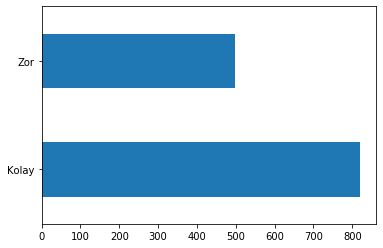

In [15]:
df.effort_kat.value_counts().plot.barh()

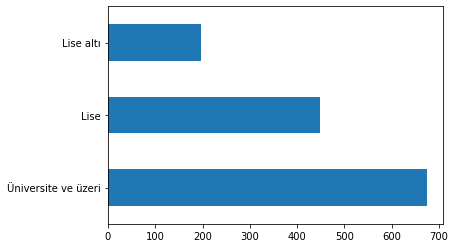

In [16]:
df.egitim.value_counts().plot.barh()

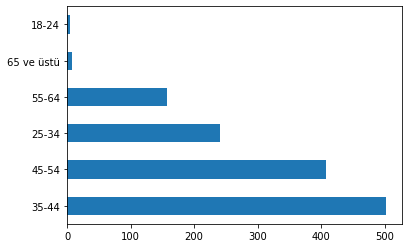

In [17]:
df.yas.value_counts().plot.barh()

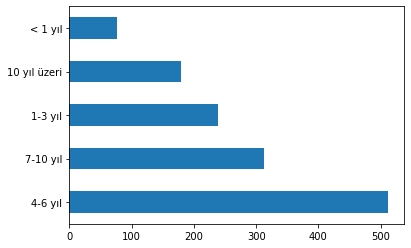

In [18]:
df.yil.value_counts().plot.barh()

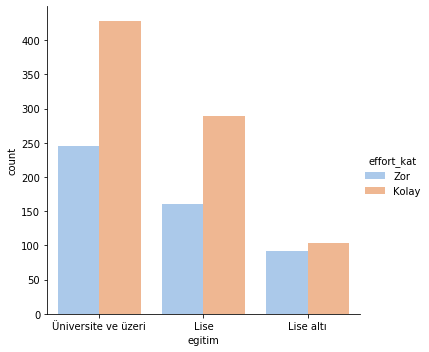

In [19]:
#Eğitim durumuna göre işlemlerini kolay-zor olarak tanımlayanlar

sns.catplot(x="egitim", kind="count", hue="effort_kat", palette="pastel", data=df);

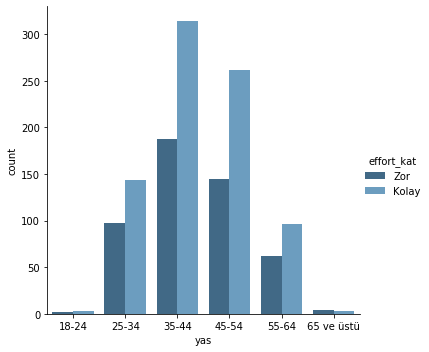

In [20]:
# Yaşlara göre işlemlerini kolay-zor olarak tanımlayanlar
sns.catplot(x="yas", kind="count", hue="effort_kat", palette="Blues_d", data=df);

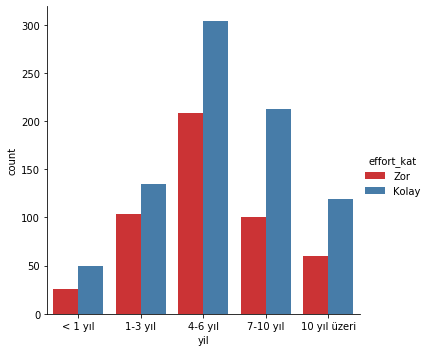

In [21]:
#yıllara göre işlemlerini kolay ve zor olarak tanımlayanlar
sns.catplot(x="yil", kind="count", hue="effort_kat", palette="Set1", data=df);

### Sınıf Sayısı 2 den fazla olan bağımsız değişkenler üzerine category işlemleri yapalım.

In [22]:
#bağımlı değişkenin görünümüne daha detaylı bakalım. Zor=1 kolay=0

df.effort_kat= pd.Categorical(df.effort_kat)
df["effort_kat"].cat.categories

Index(['Kolay', 'Zor'], dtype='object')

In [23]:
df["effort_kat"].cat.codes

0       1
1       0
2       0
3       0
4       1
       ..
1314    1
1315    0
1316    0
1317    1
1318    1
Length: 1319, dtype: int8

In [24]:
#sıralı olarak kategorize edelim

categories=pd.Categorical(df['egitim'],categories=['Lise altı','Lise','Üniversite ve üzeri'],ordered=True)
print(categories)

[Üniversite ve üzeri, Üniversite ve üzeri, Üniversite ve üzeri, Lise, Üniversite ve üzeri, ..., Lise, Lise altı, Lise, Üniversite ve üzeri, Lise altı]
Length: 1319
Categories (3, object): [Lise altı < Lise < Üniversite ve üzeri]


In [25]:
egitim,unique=pd.factorize(categories,sort=True)
df['egitim']=egitim
df['egitim']

0       2
1       2
2       2
3       1
4       2
       ..
1314    1
1315    0
1316    1
1317    2
1318    0
Name: egitim, Length: 1319, dtype: int64

In [26]:
df.yil= pd.Categorical(df.yil)
df["yil"].cat.categories

Index(['1-3 yıl', '10 yıl üzeri', '4-6 yıl', '7-10 yıl', '< 1 yıl'], dtype='object')

In [27]:
df.yas= pd.Categorical(df.yas)
df["yas"].cat.categories

Index(['18-24', '25-34', '35-44', '45-54', '55-64', '65 ve üstü'], dtype='object')

### Yas ve Yıl kolonu dummy değişken olarak (n-1) sınıf sayısı olacak şekilde alınır.

In [28]:
df1= pd.get_dummies(df, columns = ["yas"], prefix = ["yas"])

In [30]:
df1.head()

,maas,vadeli,yatirim,kart,kredi,bes,sigorta,sube,atm,intmob,...,yil,cins,egitim,effort_kat,yas_18-24,yas_25-34,yas_35-44,yas_45-54,yas_55-64,yas_65 ve üstü
0,Hayır,Hayır,Evet,Evet,Hayır,Hayır,Evet,Hayır,Evet,Evet,...,< 1 yıl,Kadın,2,Zor,1,0,0,0,0,0
1,Hayır,Evet,Evet,Hayır,Hayır,Evet,Hayır,Hayır,Hayır,Evet,...,< 1 yıl,Kadın,2,Kolay,1,0,0,0,0,0
2,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Hayır,Hayır,Evet,Evet,...,< 1 yıl,Kadın,2,Kolay,1,0,0,0,0,0
3,Hayır,Hayır,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Evet,...,< 1 yıl,Erkek,1,Kolay,1,0,0,0,0,0
4,Hayır,Hayır,Hayır,Hayır,Hayır,Evet,Evet,Hayır,Hayır,Evet,...,< 1 yıl,Erkek,2,Zor,1,0,0,0,0,0


In [31]:
df1 = df1.drop(['yas_18-24'],axis=1)

In [32]:
df=pd.get_dummies(df1, columns = ["yil"], prefix = ["yil"])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   maas              1319 non-null   object  
 1   vadeli            1319 non-null   object  
 2   yatirim           1319 non-null   object  
 3   kart              1319 non-null   object  
 4   kredi             1319 non-null   object  
 5   bes               1319 non-null   object  
 6   sigorta           1319 non-null   object  
 7   sube              1319 non-null   object  
 8   atm               1319 non-null   object  
 9   intmob            1319 non-null   object  
 10  cagmerk           1319 non-null   object  
 11  cins              1319 non-null   object  
 12  egitim            1319 non-null   int64   
 13  effort_kat        1319 non-null   category
 14  yas_25-34         1319 non-null   uint8   
 15  yas_35-44         1319 non-null   uint8   
 16  yas_45-54         1319 n

In [34]:
df = df.drop(['yil_1-3 yıl'],axis=1)

In [36]:
df.head()

,maas,vadeli,yatirim,kart,kredi,bes,sigorta,sube,atm,intmob,...,effort_kat,yas_25-34,yas_35-44,yas_45-54,yas_55-64,yas_65 ve üstü,yil_10 yıl üzeri,yil_4-6 yıl,yil_7-10 yıl,yil_< 1 yıl
0,Hayır,Hayır,Evet,Evet,Hayır,Hayır,Evet,Hayır,Evet,Evet,...,Zor,0,0,0,0,0,0,0,0,1
1,Hayır,Evet,Evet,Hayır,Hayır,Evet,Hayır,Hayır,Hayır,Evet,...,Kolay,0,0,0,0,0,0,0,0,1
2,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Hayır,Hayır,Evet,Evet,...,Kolay,0,0,0,0,0,0,0,0,1
3,Hayır,Hayır,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Evet,...,Kolay,0,0,0,0,0,0,0,0,1
4,Hayır,Hayır,Hayır,Hayır,Hayır,Evet,Evet,Hayır,Hayır,Evet,...,Zor,0,0,0,0,0,0,0,0,1


### Kategorik değişkenler üzerine binary dönüşüm yapılır. Yoksa modelin çalışmaması söz konusu olabilir.

In [38]:
from sklearn import preprocessing 
lbe= preprocessing.LabelEncoder()

In [39]:
df["maas"]= lbe.fit_transform(df["maas"])
df["vadeli"]= lbe.fit_transform(df["vadeli"])
df["yatirim"]= lbe.fit_transform(df["yatirim"])
df["kart"]= lbe.fit_transform(df["kart"])
df["kredi"]= lbe.fit_transform(df["kredi"])
df["bes"]= lbe.fit_transform(df["bes"])
df["sigorta"]= lbe.fit_transform(df["sigorta"])
df["sube"]= lbe.fit_transform(df["sube"])
df["atm"]= lbe.fit_transform(df["atm"])
df["intmob"]= lbe.fit_transform(df["intmob"])
df["cagmerk"]= lbe.fit_transform(df["cagmerk"])
df["cins"]= lbe.fit_transform(df["cins"])
df["effort_kat"]= lbe.fit_transform(df["effort_kat"])

# MODEL KURMA

## Naive Bayes

In [41]:
df = df.copy()

y = df["effort_kat"]
X = df.drop(['effort_kat'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
y_pred = nb_model.predict(X_train)

In [47]:
accuracy_score(y_train, y_pred) #model skoru

0.6492890995260664

In [48]:
confusion_matrix(y_train, y_pred) 

array([[554, 103],
       [267, 131]], dtype=int64)

### Modeli test datası ile valide edersek;

In [ ]:
nb_model.predict(X_test)[0:10]  #ilk 10 satırın tahmini

In [ ]:
nb_model.predict_proba(X_test)[0:10]  #ilk 10 satırın olasık olarak değeri

In [49]:
y_pred1 = nb_model.predict(X_test)

In [51]:
# Model Başarı Oranı

accuracy_score(y_test, y_pred1)

0.625

In [52]:
confusion_matrix(y_test, y_pred1)

array([[140,  24],
       [ 75,  25]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74       164
           1       0.51      0.25      0.34       100

    accuracy                           0.62       264
   macro avg       0.58      0.55      0.54       264
weighted avg       0.60      0.62      0.59       264



Sonuç olarak modelimizin başarı oranı % 62 çıktı.
    
    Presicion yani Kesinlik değerimiz % 60 çıktı.
    
    Recall yani Duyarlılık (tespit etme oranı) % 62 çıktı

#### Cross Validation uygulanırsa

In [62]:
from sklearn.model_selection import StratifiedKFold 

params = {}

#gridsearch searches for the best hyperparameters and keeps the classifier with the highest recall score
skf = StratifiedKFold(n_splits=5)

nb2 = GridSearchCV(nb_model, cv=skf, param_grid=params)
%time nb2.fit(X_train, y_train)

# predict values on the test set
y_pred_nb2 = nb2.predict(X_test) 

print(y_pred_nb2)

# predicted probabilities on the test set
y_scores_nb2 = nb2.predict_proba(X_test)[:, 1]



Wall time: 44.2 ms
[1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0]


In [61]:
# Model Accucay değerimiz aynı çıktı
accuracy_score(y_test, y_pred_nb2)

0.625

In [67]:
# cross_val_score(nb_model, X_train, y_train, cv = 5).mean()

0.6322274881516587

## KNN

In [68]:
df = df.copy()

y = df["effort_kat"]
X = df.drop(['effort_kat'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
#model train başarı oranı
y_pred2 = knn_model.predict(X_train)  
accuracy_score(y_train, y_pred2)

0.7488151658767772

In [74]:
#model test başarı oranı
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5984848484848485

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69       164
           1       0.46      0.38      0.42       100

    accuracy                           0.60       264
   macro avg       0.56      0.56      0.56       264
weighted avg       0.59      0.60      0.59       264



Sonuç olarak modelimizin başarı oranı % 59 çıktı.
    
    Presicion yani Kesinlik değerimiz % 59 çıktı.
    
    Recall yani Duyarlılık (tespit etme oranı) % 60 çıktı

### KNN - Cross Validation

In [87]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [88]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [89]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.637914691943128
En iyi parametreler: {'n_neighbors': 15}


In [90]:
knn = KNeighborsClassifier(15)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, y_pred3)

In [91]:
#cross validation sonucu test başarı oranı:

y_pred3 = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred3)

0.625

In [92]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.80      0.73       164
           1       0.51      0.34      0.41       100

    accuracy                           0.62       264
   macro avg       0.59      0.57      0.57       264
weighted avg       0.61      0.62      0.61       264



#### Özetle;

    Modellerin incelenmesi sonucunda Naive Bayes algoritması ile KNN-CV modelleri benzer accuracy sonuçlarını vermiştir.
    
    Ancak detaylı olarak bakıldığında KNN_CV modelinin ZOR yani 1 sınıfını bulmada daha başarılı olduğu görülmektedir. Model seçimi olarak KNN-CV modeli seçilebilir.

### Model üzerine incelemeler

Modeller incelediğinde görülmektedir ki bağımsız değişkenler içinden bir seçim yapılmamıştır. Tüm veriler kullanılmıştır. Ayrıca bağımsız değişkenlerin kategorik olması değişken seçimi metriklerini kullanmayı zorunlu kılmıştır.Değişken seçimi için "feature importance" modellerinden Random Forest modelinde karar kılınmıştır.

   * İmportance derecesi sonucu altlarda yer alan değişkenler çıkarıldığında modelin performansının arttığı görülmüştür.
   * Örnek olarak KNN modelinin accurcay değeri %59 iken feature importance sonrası bu değer %61 e yükselmiştir.

In [93]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6590909090909091

In [95]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

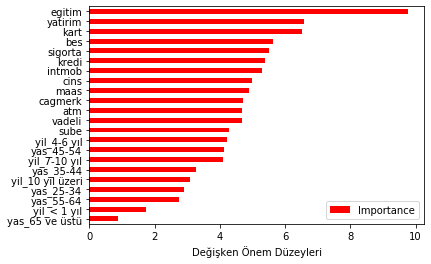

In [96]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [111]:
df = df.copy()

y = df["effort_kat"]
X = df.drop(['effort_kat','sube','vadeli','atm'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [113]:
#KNN modeli uygulanırsa

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

#model test başarı oranı
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6136363636363636

#### not: Gradient Boosting Classifier ve Random Forest modellerini de aynı veri üzerinden atacağım.